# US National Obesity Rate in 2015 (state by state)

- This notebook will explore the obesity rates state by state
- First, the notebook will calculate the national obesity rate 
- Second, the notebook will calculate the  national obesity rate for every state 
- Third, the notebook will show a graph comparing the obesity rates state by state
- The purpose of this notebook is to show what state has the highest and lowest obesity rate

# Setup

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy.random as np
import sys
import matplotlib 
import seaborn as sns
import numpy as np

### Note: This notebook will use the gender data frame as it provides us with the obesity rates of the entire population (male and female)

# Import and Explore Obesity by Gender Data Frame

In [2]:
obesity_in_US_gender_2015 = pd.read_csv('../data/Clean Data/obesity_in_US_gender_2015.csv')

In [3]:
obesity_in_US_gender_2015

,Unnamed: 0,year,state,state_name,gender_pc,Data_Value_Alt,Question,Sample_Size,Total,Gender,GeoLocation,LocationID,StratificationCategory1,Stratification1
0,0,2015,ID,Idaho,29.8,29.8,Percent of adults aged 18 years and older who ...,2420.0,NaN,Male,"(43.682630005000476, -114.3637300419997)",16,Gender,Male
1,1,2015,FL,Florida,42.5,42.5,Percent of adults aged 18 years and older who ...,3895.0,NaN,Male,"(28.932040377000476, -81.92896053899966)",12,Gender,Male
2,2,2015,AL,Alabama,34.9,34.9,Percent of adults aged 18 years and older who ...,2958.0,NaN,Male,"(32.84057112200048, -86.63186076199969)",1,Gender,Male
3,3,2015,AL,Alabama,36.4,36.4,Percent of adults aged 18 years and older who ...,4425.0,NaN,Female,"(32.84057112200048, -86.63186076199969)",1,Gender,Female
4,4,2015,AL,Alabama,28.4,28.4,Percent of adults aged 18 years and older who ...,4425.0,NaN,Female,"(32.84057112200048, -86.63186076199969)",1,Gender,Female
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
211,211,2015,GU,Guam,40.1,40.1,Percent of adults aged 18 years and older who ...,761.0,NaN,Male,"(13.444304, 144.793731)",66,Gender,Male
212,212,2015,PR,Puerto Rico,27.8,27.8,Percent of adults aged 18 years and older who ...,1914.0,NaN,Male,"(18.220833, -66.590149)",72,Gender,Male
213,213,2015,PR,Puerto Rico,31.1,31.1,Percent of adults aged 18 years and older who ...,3240.0,NaN,Female,"(18.220833, -66.590149)",72,Gender,Female
214,214,2015,PR,Puerto Rico,34.3,34.3,Percent of adults aged 18 years and older who ...,3240.0,NaN,Female,"(18.220833, -66.590149)",72,Gender,Female


In [4]:
obesity_in_US_gender_2015['Gender'].unique()

array(['Male', 'Female'], dtype=object)

In [5]:
obesity_in_US_gender_2015['Gender'].value_counts()

Male      108
Female    108
Name: Gender, dtype: int64

# Questions: 

#### Question 1: What is the national obesity rate in 2015?
- Steps: 
    - make national its own data frame named "gender_obesity_in_US_national_2015_df"
    - create a filter "national_avg_2015" to find the mean obesity rate nationally

#### Question 2: What is the average US obesity rate by state in 2015?
- Steps: 
    - create a new data frame that only has US states named "obesity_in_US_gender_2015"
    - create a data frame named "obesity_in_2015_bystate_avg" on the 'obesity_in_US_gender_2015' data frame           to calculate the mean by state
    - use the region mean data to plot a bar chart and add labels

#### Question 3: What state has the highest obesity rate in 2015? What state has the lowest obesity rate in 2015?
- Steps:
    - calculate the mean of the gender_pc column grouping by state 
    - sort it in descending order and name the result "US_in_2015"
    - get the top 5 ranked states and name the result "top5_states"
    - get the bottom 5 ranked states and name the result "bottom5_states"



# Question 1: What is the national obesity rate in 2015?

In [6]:
#make national its own dataframe named "gender_obesity_in_US_national_2015_df"
gender_obesity_in_US_national_2015_df=obesity_in_US_gender_2015[(obesity_in_US_gender_2015['state_name']=='National')]
gender_obesity_in_US_national_2015_df

,Unnamed: 0,year,state,state_name,gender_pc,Data_Value_Alt,Question,Sample_Size,Total,Gender,GeoLocation,LocationID,StratificationCategory1,Stratification1
204,204,2015,US,National,28.6,28.6,Percent of adults aged 18 years and older who ...,221909.0,NaN,Female,NaN,59,Gender,Female
205,205,2015,US,National,29.1,29.1,Percent of adults aged 18 years and older who ...,176407.0,NaN,Male,NaN,59,Gender,Male
206,206,2015,US,National,29.8,29.8,Percent of adults aged 18 years and older who ...,221909.0,NaN,Female,NaN,59,Gender,Female
207,207,2015,US,National,41.4,41.4,Percent of adults aged 18 years and older who ...,176407.0,NaN,Male,NaN,59,Gender,Male


- "gender_obesity_in_US_national_2015_df"
    - this data frame represents the country as a whole 
    - use it to calculate national obesity rate as a whole

In [7]:
gender_obesity_in_US_national_2015_df['Gender'].value_counts()

Female    2
Male      2
Name: Gender, dtype: int64

In [8]:
# Create a filter "national_avg_2015" to find the mean obesity rate nationally
national_avg_2015=gender_obesity_in_US_national_2015_df['gender_pc'].mean()
national_avg_2015


32.225

In [9]:
# Use "national_avg_2015" filter to show the national obesity rate average on chart
national_avg_2015=gender_obesity_in_US_national_2015_df.groupby('state_name')['gender_pc'].mean()
national_avg_2015
title1='The national obesity rate average in 2015'
print("{}\n{}".format(title1, '='*len(title1)))
print(national_avg_2015.sort_values())





The national obesity rate average in 2015
state_name
National    32.225
Name: gender_pc, dtype: float64


### Answer: The national obesity rate average in 2015 was 32.2%

Text(0.5, 1.0, '2015')

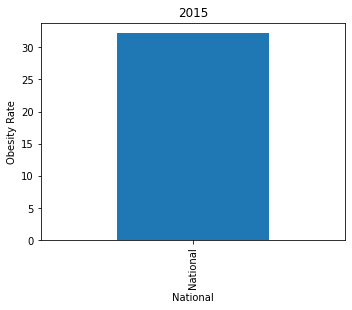

In [10]:

# 1. Set up the figure to plot two bar charts and specify size ratio (3:1)
plt.figure(figsize=(12,4))

# 2. the plt.subplot() function divides the main figure into rows and columns
plt.subplot(121)

# use the national_avg_2015 mean data to plot a bar chart and add labels
national_avg_2015.plot(kind='bar')
plt.xlabel('National')
plt.ylabel('Obesity Rate')
plt.title('2015')


# **Create a new data frame that only has US states

In [11]:
# Create a data frame named "obesity_in_US_gender_2015" that excludes the rows 
# with the value "National", Guam", "Puerto Rico", "Virgin Islands" in the LocationDesc column
obesity_in_US_gender_2015=obesity_in_US_gender_2015[~(obesity_in_US_gender_2015['state_name']=='National')]
obesity_in_US_gender_2015=obesity_in_US_gender_2015[~(obesity_in_US_gender_2015['state_name']=='Guam')]
obesity_in_US_gender_2015=obesity_in_US_gender_2015[~(obesity_in_US_gender_2015['state_name']=='Puerto Rico')]
obesity_in_US_gender_2015=obesity_in_US_gender_2015[~(obesity_in_US_gender_2015['state_name']=='Virgin Islands')]
obesity_in_US_gender_2015['state_name'].unique()


array(['Idaho', 'Florida', 'Alabama', 'Alaska', 'Arizona', 'Arkansas',
       'California', 'Colorado', 'Connecticut', 'Delaware',
       'District of Columbia', 'Illinois', 'Georgia', 'Hawaii', 'Indiana',
       'Iowa', 'Kansas', 'Kentucky', 'Maine', 'Massachusetts',
       'Louisiana', 'Maryland', 'Michigan', 'Minnesota', 'Mississippi',
       'Missouri', 'Montana', 'Nebraska', 'Nevada', 'New Hampshire',
       'New Jersey', 'New Mexico', 'New York', 'North Carolina',
       'North Dakota', 'Ohio', 'Oklahoma', 'Oregon', 'South Dakota',
       'Pennsylvania', 'Rhode Island', 'South Carolina', 'Tennessee',
       'Texas', 'Utah', 'Vermont', 'Virginia', 'Washington',
       'West Virginia', 'Wisconsin', 'Wyoming'], dtype=object)

# Question 2: What is the average US obesity rate by state?

In [12]:
# create a data frame named "obesity_in_2015_bystate_avg" on the 'obesity_in_US_gender_2015' data frame to calculate the mean by state 
obesity_in_2015_bystate_avg = obesity_in_US_gender_2015.sort_values(['state_name'], ascending = [True])
obesity_in_2015_bystate_avg=obesity_in_2015_bystate_avg[['state','state_name','gender_pc','Gender']]
obesity_in_2015_bystate_avg = obesity_in_2015_bystate_avg.groupby('state_name')['gender_pc'].mean()
obesity_in_2015_bystate_avg



state_name
Alabama                 34.375
Alaska                  33.375
Arizona                 32.550
Arkansas                34.750
California              30.075
Colorado                28.150
Connecticut             30.800
Delaware                33.425
District of Columbia    27.225
Florida                 32.025
Georgia                 32.775
Hawaii                  28.350
Idaho                   32.450
Illinois                33.125
Indiana                 33.275
Iowa                    33.200
Kansas                  33.925
Kentucky                33.525
Louisiana               34.625
Maine                   33.250
Maryland                32.500
Massachusetts           29.875
Michigan                33.100
Minnesota               31.250
Mississippi             35.100
Missouri                33.100
Montana                 30.275
Nebraska                33.400
Nevada                  32.175
New Hampshire           31.725
New Jersey              31.650
New Mexico              32.2

Text(0.5, 1.0, 'US Obesity Rates by State in 2015')

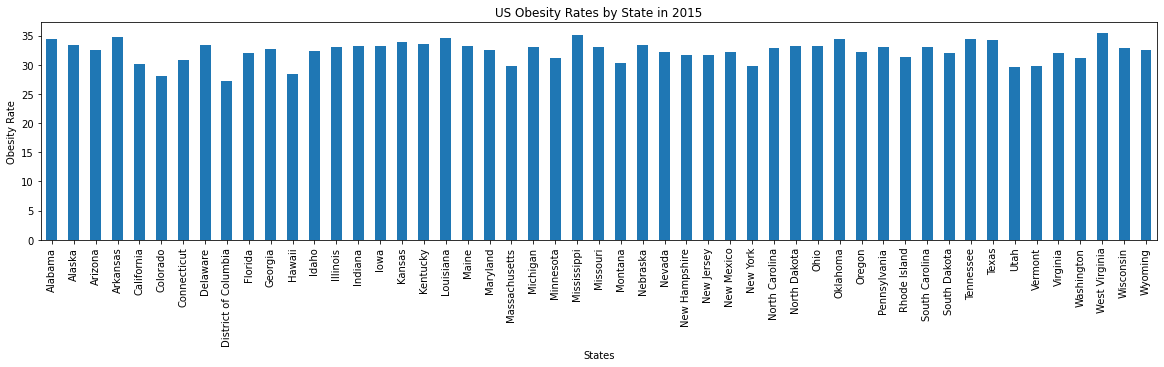

In [13]:
# 1. Set up the figure to plot bar chart
plt.figure(figsize=(20,4))
plt.subplot

# use the 'obesity_in_2015_bystate_avg' mean data to plot a bar chart and add labels
obesity_in_2015_bystate_avg.plot(kind='bar')
plt.xlabel('States')
plt.ylabel('Obesity Rate')
plt.title('US Obesity Rates by State in 2015')

# Question 3: What state has the highest obesity rate in 2015? What state has the lowest obesity rate in 2015?

In [14]:
# 1. calculate the mean of the gender_pc column grouping by state 
#    sort it in descending order and name the result "US_in_2015"

# 2. get the top 5 ranked states and name the result "top5_states"

# 3. get the bottom 5 ranked states and name the result "bottom5_states"

US_in_2015=obesity_in_US_gender_2015.groupby('state_name')['gender_pc'].mean().sort_values(ascending=False)
top5_states = US_in_2015.head(5)
bottom5_states = US_in_2015.tail(5)



print("Measuring US obesity rates by state.\n")
print(f"The top 5 states are { ', '.join(top5_states.index)}")
print(f"The bottom 5 states are { ', '.join(bottom5_states.index)}")
US_in_2015.sort_values(ascending=False).to_frame()

Measuring US obesity rates by state.

The top 5 states are West Virginia, Mississippi, Arkansas, Louisiana, Oklahoma
The bottom 5 states are New York, Utah, Hawaii, Colorado, District of Columbia


,gender_pc
state_name,
West Virginia,35.500
Mississippi,35.100
Arkansas,34.750
Louisiana,34.625
Oklahoma,34.425
Alabama,34.375
Tennessee,34.350
Texas,34.225
Kansas,33.925


### West Virginia had the highest US obesity rate in 2015 at 35.5% and Colorado had the lowest US obesity rate in 2015 at 28.2%

# Conclusion

## National Obesity Rate
- The national obesity rate average in 2015 was 32.2%
- West Virginia had the highest US obesity rate in 2015 at 35.5% and Colorado had the lowest US obesity rate in 2015 at 28.2%